# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция выполнения:** Выполните задания в этом же ноутбуке (места под решения **КАЖДОЙ** задачи обозначены как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**)

**Как отправить задание на проверку:** Вам необходимо сохранить ваше решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Срок проверки преподавателем:** домашнее задание проверяется **в течение 3 дней после дедлайна сдачи** с предоставлением обратной связи

# **Прежде чем проверять задания:**

1. Перезапустите **ядро (restart the kernel)**: в меню, выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart)**
2. Затем **Выполнить** **все ячейки (run all cells)**: в меню, выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert.**

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание №4. Линейная классификация. Логистическая регрессия. Метод опорных векторов.

**Цели домашнего задания:** Решить проблемы бинарной классификации вручную. Решить многоклассовую классификацию на примере датасета рукописных цифр MNIST с помощью готовых библиотек. Реализовать метод опорных векторов.

In [1]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Часть 1. Реализация алгоритма линейной классификации для бинарных данных

В этой части, мы создадим синтетический набор бинарных данных и обучим модель вручную. Для этого нам неодходимо написать функцию сигмоиды, вычислить функцию потерь и её производную, чтобы использовать их во время градиентного спуска.

**Задание 1 (1 балл)**

Реализуйте функцию сигмоиды `sigmoid(z)`.

In [2]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [3]:
assert np.isclose(sigmoid(5), 1, atol=0.01)

**Задание 2 (1 балл)**

Реализуйте логистическую функцию потерь `compute_cost(y, y_pred)`.



In [4]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def compute_cost(y, y_pred):

    m = len(y)
    return - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [5]:
y_pred = np.array([0.1, 0.8, 0.4])
y = np.array([0, 1, 0])

assert np.isclose(compute_cost(y, y_pred), 0.28, atol=0.01)

**Задание 3 (1 балл)**

Реализуйте градиент логистической функции потерь `compute_gradient(X, y, w)`.

In [6]:
def compute_gradient(X, y, w):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
  
    m = len(y)
    y_pred = sigmoid(np.dot(X, w))
    gradient = (1/m) * np.dot(X.T, (y_pred - y))
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return gradient

In [7]:
X = np.array([[1, 2], [1, 3], [1, 4]])  # Пример данных с добавленным bias term
y = np.array([0, 1, 0])  # Метки классов
weights = np.array([0.1, -0.2])  # Начальные веса

assert np.allclose(compute_gradient(X, y, weights), [0.04, 0.10], atol=0.01)

**Задание 4 (1 балл)**

По аналогии с предыдущим домашним заданием, реализуйте функцию градиентного спуска.

In [8]:
# Функция градиентного спуска
def gradient_descent(X, y, w, learning_rate, num_iterations):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    w_tmp = w.copy()
    for _ in range(num_iterations):
        gradient = compute_gradient(X, y, w_tmp)
        w_tmp -= learning_rate * gradient

    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w_tmp

In [9]:
assert np.allclose(gradient_descent(X, y, weights, 0.03, 300), [-0.01, -0.22], atol=0.01)

**Задание 5 (1 балл)**

Подготовьте синтетические бинарные данные с помощью команды из библиотеки `sklearn`. Используйте функцию `make_classification`. Создайте 200 точек с двумя признаками и двумя классами, без излишних признаков (`n_redundant=0`). Зафиксируйте `random_state=42`. Добавьте столбец единиц к данным для свободного члена.

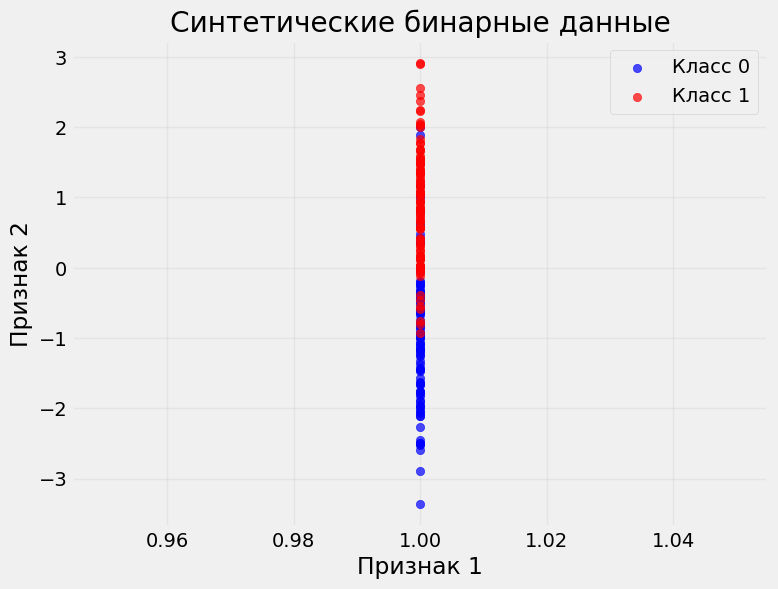

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_classes=2, random_state=42)

X = np.c_[np.ones(X.shape[0]), X]
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Класс 1', alpha=0.7)
plt.title("Синтетические бинарные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Задание 6 (1 балл)**

Создайте новую переменную `X_ones`, добавив столбец единиц к данным для свободного члена с помощью `numpy` команды `concatenate`. Разбейте данные на тренировочную и тестовую выборки, выделив 20% данных под тестирование. Инициализируйте веса `weights` случайным образом.

In [11]:
from sklearn.model_selection import train_test_split
# Не удаляйте и не меняйте seed
np.random.seed(21)


# НАЧАЛО ВАШЕГО РЕШЕНИЯ

# Если X уже содержит 3 столбца, значит, столбец единиц был добавлен ранее
X_ones = X  # Используем X без изменений


X_train, X_test, y_train, y_test = train_test_split(X_ones, y, test_size=0.2, random_state=21)
weights = np.random.randn(X_train.shape[1])

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [12]:
assert X_ones.shape[1]==3 and X_ones.shape[0]==200
assert weights.shape[0]==3

**Задание 7 (1 балл)**

Обучите модель и предскажите значения для тестовой выборки. Вычислите значение функции потерь для тестовой выборки, `test_cost`.

*Hint!* Не забудьте сигмоиду ;)

In [13]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Обучение модели
learning_rate = 0.1
num_iterations = 1000
optimized_weights = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

# Предсказание на тестовой выборке
y_test_pred = sigmoid(np.dot(X_test, optimized_weights))

# Вычисление значения функции потерь на тестовой выборке
test_cost = compute_cost(y_test, y_test_pred)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [14]:
assert np.isclose(test_cost, 0.3, atol=0.01)

## Часть 2. Реализация алгоритма бинарной классификации sklearn. Сравнение результатов.

**Задание 8 (1 балл)**

Реализуйте обучение на тех же данных с помощью готовой функции `LogisticRegression` из `sklearn.linear_model`. Предскажите вероятности для тестовой выборки с помощью метода `predict_proba` и оцените качество обучения при помощи `log_loss` из `sklearn.metrics`. Запишите значение функции потерь в переменную `cost_sklearn`.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Создание и обучение модели логистической регрессии
model = LogisticRegression(random_state=21)
model.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_test_pred_sklearn = model.predict_proba(X_test)[:, 1]

# Вычисление значения функции потерь log_loss
cost_sklearn = log_loss(y_test, y_test_pred_sklearn)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [16]:
assert np.isclose(cost_sklearn, 0.3, atol=0.01)

Обратите внимание, что мы получили схожие значения функций потерь обоими методами.
Теперь мы можем перейти к многоклассовой классификации.

## Часть 3. Реализация алгоритма многоклассовой классификации на примере данных `digits`.



Теперь, когда мы разобрались с тем, как работает обучение модели бинарной классификации, мы можем перейти к проблеме многих классов. В качестве примера, рассмотрим задачу классификации рукописных цифр из классического набора данных `digits`. Первым шагом необходимо загрузить данные. Мы будем использовать функцию `load_digits` из модуля `sklearn.datasets`, которая загрузит набор данных `digits` с цифрами от 0 до 9.

In [17]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data # изображения, преобразованные из матрицы (8, 8) в вектор (64,)
y = digits.target

Для визуализации цифр из набора данных, загруженного с помощью библиотеки scikit-learn, можно использовать функцию `imshow() `библиотеки Matplotlib.

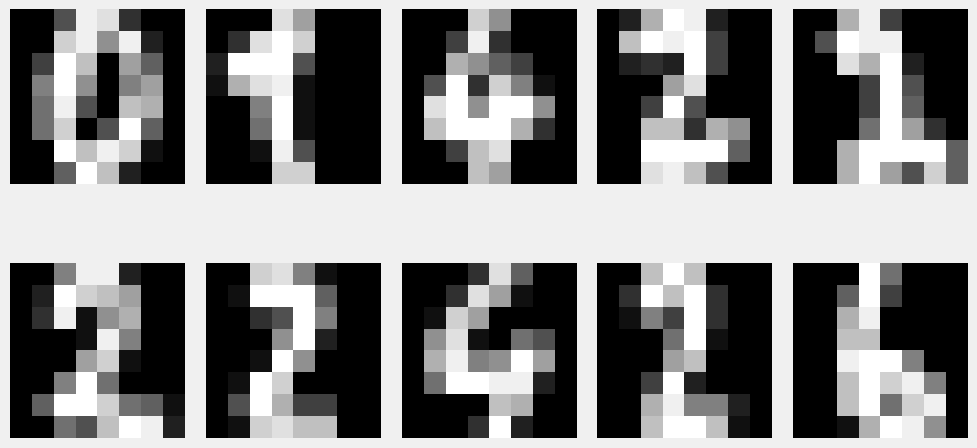

In [18]:
# Визуализация нескольких случайных изображений цифр
indices = np.random.choice(len(X), 10, replace=False)
random_digits = X[indices]

# Создаём сетку 5x2 для отображения изображений
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Строим картинки в каждой ячейке сетки
for i, ax in enumerate(axes.flat):
    ax.imshow(random_digits[i].reshape((8,8)), cmap='gray')
    ax.axis('off')  # Убираем оси

# Эта команда помогает избегать наложений объектов графика
plt.tight_layout()
plt.show()

Как обычно, необходимо разделить данные на обучающую и тестовую выборки:

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**Задание 9 (1 балл)**

Создайте по экземпляру класса `LogisticRegression` (`sklearn.linear_model`) и `SVC` (`sklearn.svm`). Внимательно почитайте официальную [документацию OneVsRestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), обратите внимание на то, какие аргументы принимает этот класс. Назовите их `softmax_model` и `ovr_model`, соответственно. Обучите обе модели на данных MNIST. Сделайте предсказания для тестовой выборки.

In [28]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ

mnist = fetch_openml("mnist_784", version=1, parser="auto")
X, y = mnist.data / 255.0, mnist.target.astype(int) 

X_sample, _, y_sample, _ = train_test_split(X, y, train_size=40000, random_state=21, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=21)

softmax_model = LogisticRegression(multi_class="multinomial", solver="saga", C=100.0, max_iter=1000, tol=1e-4, random_state=21)
softmax_model.fit(X_train, y_train)

svm_model = SVC(kernel="rbf", probability=True, max_iter=1000, random_state=21)
svm_model.fit(X_train, y_train)

y_pred_softmax = softmax_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

y_proba_softmax = softmax_model.predict_proba(X_test)
y_proba_svm = svm_model.predict_proba(X_test)


accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

log_loss_softmax = log_loss(y_test, y_proba_softmax)
log_loss_svm = log_loss(y_test, y_proba_svm)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [29]:
assert type(softmax_model) == LogisticRegression and softmax_model.max_iter == 1000
assert type(svm_model) == SVC and svm_model.max_iter == 1000

**Задание 10 (1 балл)**

Вычислите и сравните основные метрики классификации. Для вычисления `precision`, `recall` и `F1-score` воспользуйтесь готовыми метриками из библиотки `sklearn.metrics` (найдите названия нужных функций самостоятельно). Укажите аргумент `average='macro'` для вычисления метрик усреднённых по категориям. Сохраните значения метрик в переменные:

* `softmax_accuracy_score`
* `softmax_precision_score`
* `softmax_recall_score`
* `softmax_f1_score`


* `svm_accuracy_score`
* `svm_precision_score`
* `svm_recall_score`
* `svm_f1_score`



In [30]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics for Softmax model
softmax_accuracy_score = accuracy_score(y_test, y_pred_softmax)
softmax_precision_score = precision_score(y_test, y_pred_softmax, average='macro')
softmax_recall_score = recall_score(y_test, y_pred_softmax, average='macro')
softmax_f1_score = f1_score(y_test, y_pred_softmax, average='macro')

# Compute metrics for SVM model
svm_accuracy_score = accuracy_score(y_test, y_pred_svm)
svm_precision_score = precision_score(y_test, y_pred_svm, average='macro')
svm_recall_score = recall_score(y_test, y_pred_svm, average='macro')
svm_f1_score = f1_score(y_test, y_pred_svm, average='macro')
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [31]:
# Качество по всем метрикам должно быть выше 95%
print(f"softmax_accuracy_score: {softmax_accuracy_score}")
print(f"softmax_precision_score: {softmax_precision_score}")
print(f"softmax_recall_score: {softmax_recall_score}")
print(f"softmax_f1_score: {softmax_f1_score}")

print(f"svm_accuracy_score: {svm_accuracy_score}")
print(f"svm_precision_score: {svm_precision_score}")
print(f"svm_recall_score: {svm_recall_score}")
print(f"svm_f1_score: {svm_f1_score}")

softmax_accuracy_score: 0.908875
softmax_precision_score: 0.9077798839488521
softmax_recall_score: 0.9075393302651051
softmax_f1_score: 0.9076035586823299
svm_accuracy_score: 0.974875
svm_precision_score: 0.9745950584162912
svm_recall_score: 0.9746159382357311
svm_f1_score: 0.9745791782769091


In [32]:
assert softmax_accuracy_score > 0.95
assert softmax_precision_score > 0.95
assert softmax_recall_score > 0.95
assert softmax_f1_score > 0.95

assert svm_accuracy_score > 0.95
assert svm_precision_score > 0.95
assert svm_recall_score > 0.95
assert svm_f1_score > 0.95

AssertionError: 

# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм логистической регрессии с помощью градиентного спуска. Вы углубили навыки пользования библиотекой `sklearn` для обучения моделей, создания синтетических данных и вычисления метрик оценки качества моделей.